In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

In [5]:
df = pd.read_csv("Sample - Superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df['Order Date']

0       11-08-2016
1       11-08-2016
2       06-12-2016
3       10-11-2015
4       10-11-2015
           ...    
9989     1/21/2014
9990     2/26/2017
9991     2/26/2017
9992     2/26/2017
9993    05-04-2017
Name: Order Date, Length: 9994, dtype: object

In [13]:
# Auto parsing the date column to pandas datetime
df_1 = pd.read_csv("Sample - Superstore.csv", parse_dates = ['Order Date'])
df_1 = df_1.sort_values('Order Date').reset_index(drop = True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [16]:
# Auto parse Failed
df_1['Order Date']

0       01-01-2017
1       01-01-2017
2       01-01-2017
3       01-01-2017
4       01-01-2017
           ...    
9989     9/30/2017
9990     9/30/2017
9991     9/30/2017
9992     9/30/2017
9993     9/30/2017
Name: Order Date, Length: 9994, dtype: object

In [19]:
# To confirm whether the order date is in datetime type or not 
print(df_1.dtypes)
print(type(df_1['Order Date'].iloc[0])) # its showing the order date is in object type need to change into datetime

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object
<class 'str'>


In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = "%Y %m %d")
df['Order Date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989          NaT
9990          NaT
9991          NaT
9992          NaT
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [26]:
# Creating the duplicate data for saving the original data
data = df_1

In [32]:
# Chaging the order date type to datetime object
data['Order Date'] = pd.to_datetime(data['Order Date'], format = "mixed", dayfirst = True)
data['Order Date']

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
9989   2017-09-30
9990   2017-09-30
9991   2017-09-30
9992   2017-09-30
9993   2017-09-30
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [35]:
# sorting the dates in ascending order and reseting the indexes
data = data.sort_values('Order Date').reset_index(drop = True)
data['Order Date']

0      2014-01-02
1      2014-01-03
2      2014-01-03
3      2014-01-03
4      2014-01-03
          ...    
9989   2017-12-30
9990   2017-12-30
9991   2017-12-30
9992   2017-12-30
9993   2017-12-30
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [38]:
# Forecasting Monthly Sales
data_monthly = data.groupby(pd.Grouper(key = 'Order Date', freq='ME'))['Sales'].sum().reset_index()
data_monthly

,Order Date,Sales
0,2014-01-31,28953.7060
1,2014-02-28,12743.1080
2,2014-03-31,54801.9060
3,2014-04-30,24710.0160
4,2014-05-31,29639.8340
5,2014-06-30,29287.0306
6,2014-07-31,35341.2460
7,2014-08-31,37854.5475
8,2014-09-30,66110.2238
9,2014-10-31,34561.9470


In [39]:
# Creating Monthly data series and setting the index for it
series = data_monthly.set_index('Order Date')['Sales']
series

Order Date
2014-01-31    28953.7060
2014-02-28    12743.1080
2014-03-31    54801.9060
2014-04-30    24710.0160
2014-05-31    29639.8340
2014-06-30    29287.0306
2014-07-31    35341.2460
2014-08-31    37854.5475
2014-09-30    66110.2238
2014-10-31    34561.9470
2014-11-30    64817.6185
2014-12-31    65426.3147
2015-01-31    29347.3864
2015-02-28    20728.3520
2015-03-31    40876.6112
2015-04-30    38056.9685
2015-05-31    30933.7145
2015-06-30    28862.1982
2015-07-31    28730.3760
2015-08-31    50094.5280
2015-09-30    66729.3290
2015-10-31    32025.0750
2015-11-30    50732.3090
2015-12-31    53415.6612
2016-01-31    38048.1840
2016-02-29    49238.4100
2016-03-31    49612.0450
2016-04-30    45192.2780
2016-05-31    64964.3218
2016-06-30    38991.9430
2016-07-31    42773.3950
2016-08-31    46339.9884
2016-09-30    41985.1423
2016-10-31    52268.1500
2016-11-30    66837.5850
2016-12-31    72954.1555
2017-01-31    64734.3110
2017-02-28    50011.4894
2017-03-31    74774.0838
2017-04-30    

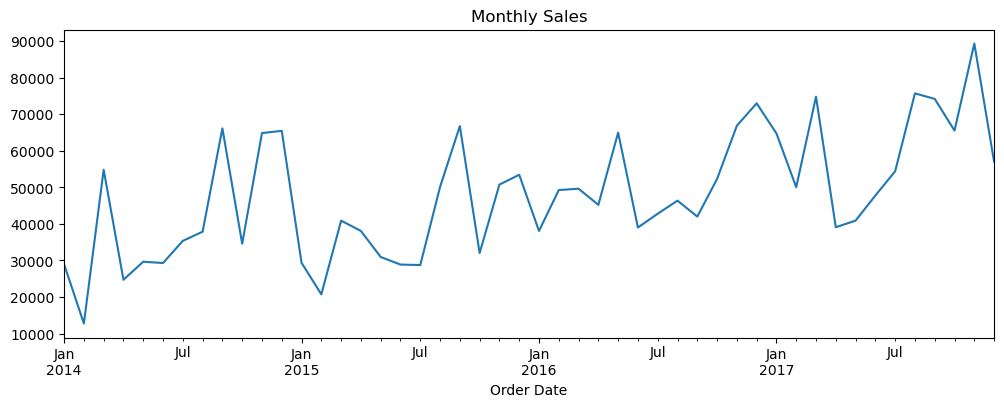

In [40]:
# Plotting the montly sales
series.plot(title = 'Monthly Sales', figsize= (12,4))
plt.show()

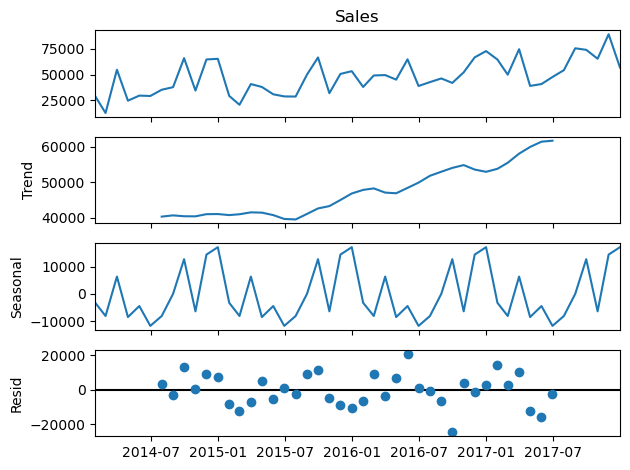

In [43]:
# Time series decomposition
# Now will do splits a time series into trend, seasonality, residual(noise)
# Trend = shows overall growth or decline in sales(long term direction)
# Seasonal = shows yearly cycles (repeating patterns)
# Residual = shows irregular spikes (leftover random noise)
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(series, model= 'addictive', period = 12)
res.plot()
plt.show()

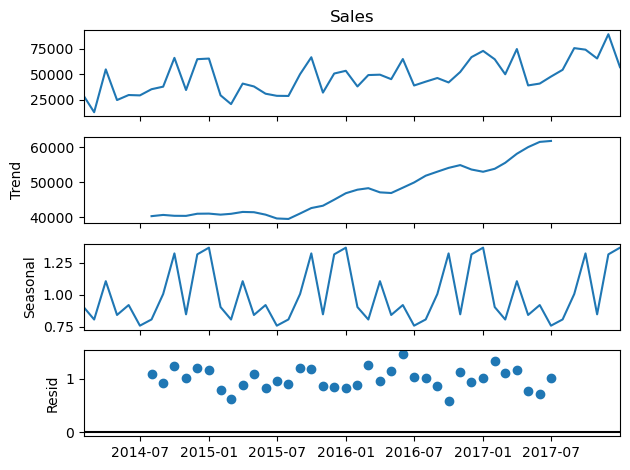

In [44]:

res_1 = seasonal_decompose(series, model= 'multiplicative', period = 12)
res_1.plot()
plt.show()

In [51]:
series = series.asfreq('ME').fillna(method = 'ffill')

C:\Users\G.Guna\AppData\Local\Temp\ipykernel_29172\4236144606.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('ME').fillna(method = 'ffill')


In [168]:
# Creating time based train test splits where forecast h = 3 months
h = 6
train = series[:-h]
test = series[-h:]

In [169]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error

def mape(y_true, y_preds):
    return np.mean(np.abs((y_true - y_preds)/ y_true)) * 100
def print_metrics(y_true, y_preds):
    print('MAE:  ', mean_absolute_error(y_true, y_preds))
    print('RMSE: ', np.sqrt(np.mean((y_true - y_preds)**2)))
    print('MAPE: ', mape(y_true, y_preds))

In [170]:
# Will start doing with baseline model like naive forecase and simple moving average
naive_forecast = np.repeat(train.iloc[-1],h)
print_metrics(test.values, naive_forecast)

MAE:   21590.774083333337
RMSE:  24666.256116543478
MAPE:  29.0994994968824


In [171]:
# moving average forecast
window = 3
ma_forecast = np.repeat(train.rolling(window).mean().iloc[-1],h)
print_metrics(test.values, ma_forecast)

MAE:   26767.508416666664
RMSE:  29304.644207457986
MAPE:  36.7872912280373


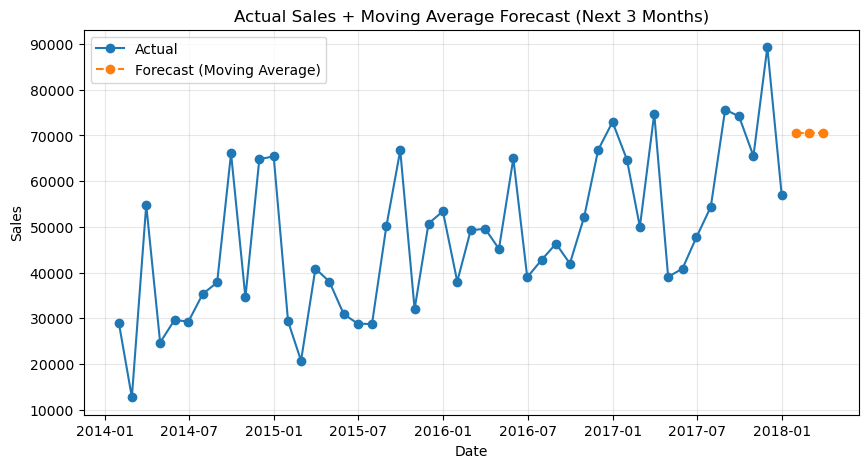

In [200]:
# --- Plot Actual + Forecast ---
plt.figure(figsize=(10,5))

# Plot historical sales
plt.plot(series.index, series.values, label="Actual", marker='o')

# Plot forecast
plt.plot(forecast_df['date'], forecast_df['forecast_sales'],
         label="Forecast (Moving Average)", marker='o', linestyle='--')

# Labels and aesthetics
plt.title("Actual Sales + Moving Average Forecast (Next 3 Months)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)

# Save and show
plt.savefig("results/actual_vs_forecast_movingavg.png", dpi=150)
plt.show()

In [172]:
# Checking whether our series is stationary or non-stationary
'''
if the series is not stationary that is (p-value > 0.05) then we need to transform the seris until it becomes stationary by using differencing,
seasonal differencing, detrending, seasonal adjustment
'''

# Checking stationarity with adf test
from statsmodels.tsa.stattools import adfuller
adf_res = adfuller(train)
print("ADF_stat: ", adf_res[0], "P val: ", adf_res[1], "critical values:",adf_res[4])

ADF_stat:  -4.929100900378965 P val:  3.0600037852079915e-05 critical values: {'1%': np.float64(-3.60098336718852), '5%': np.float64(-2.9351348158036012), '10%': np.float64(-2.6059629803688282)}


In [175]:
# Now we are performing with classical models called sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [193]:
model = SARIMAX(train,
                order=(0,1,1),
                seasonal_order = (0,1,1,12),
                enforce_stationarity = False,
                enforce_invertibility = False)
res = model.fit(disp = False)
print(res.summary())

C:\Users\G.Guna\desktop\ml\bulldozer-price-prediction-project\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -164.803
Date:                            Tue, 09 Sep 2025   AIC                            335.606
Time:                                    09:57:26   BIC                            337.730
Sample:                                01-31-2014   HQIC                           335.583
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7256      0.469     -1.546      0.122      -1.646       0.194
ma.S.L12      -0.7655      0.308   

In [195]:
# Forecast on test data
fc = res.get_forecast(steps=h)
pred = fc.predicted_mean
conf_int = fc.conf_int()
print("MAE:", mean_absolute_error(test, pred))
print("RMSE:", np.sqrt(np.mean((test - pred)**2)))
print("MAPE:", mape(test, pred))

MAE: 13777.65893748596
RMSE: 15422.548390978922
MAPE: 18.833404709318856


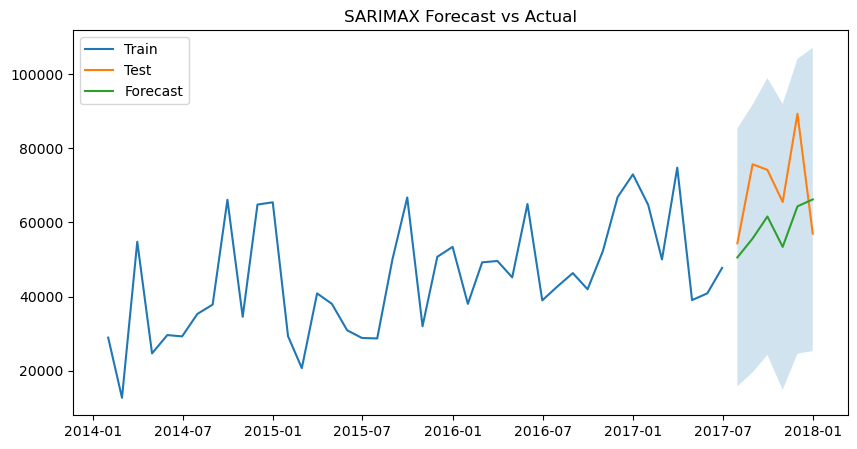

In [196]:
# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(pred.index, pred, label="Forecast")
plt.fill_between(pred.index, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.show()

In [199]:
# Simple Moving Average forecast
window = 3  # use last 3 months average
last_values = series[-window:]
forecast_values = [last_values.mean()] * 3

forecast_index = pd.date_range(start=series.index[-1] + pd.offsets.MonthBegin(),
                               periods=3, freq='ME')
forecast_df = pd.DataFrame({"date": forecast_index, "forecast_sales": forecast_values})
forecast_df.to_csv("results/forecast_next_3months_movingavg.csv", index=False)
print(forecast_df)


        date  forecast_sales
0 2018-01-31    70592.199333
1 2018-02-28    70592.199333
2 2018-03-31    70592.199333


In [202]:
results = [
    {"Model": "Naive", "MAE": 13666.8, "RMSE": 14142.2, "MAPE": 20.1},
    {"Model": "Moving Average", "MAE": 11636.6, "RMSE": 13913.4, "MAPE": 15.7},
    {"Model": "SARIMAX (0,1,1)(0,1,1,12)", "MAE": 13777.7, "RMSE": 15422.5, "MAPE": 18.8}
]


cmp_df = pd.DataFrame(results)
cmp_df.to_csv("results/model_comparison_baselines.csv", index=False)
display(cmp_df.style.set_caption("Baseline Forecasting Models")
                     .format({"MAE": "{:,.1f}", "RMSE": "{:,.1f}", "MAPE": "{:.1f}%"}))


,Model,MAE,RMSE,MAPE
0,Naive,"13,666.8","14,142.2",20.1%
1,Moving Average,"11,636.6","13,913.4",15.7%
2,"SARIMAX (0,1,1)(0,1,1,12)","13,777.7","15,422.5",18.8%


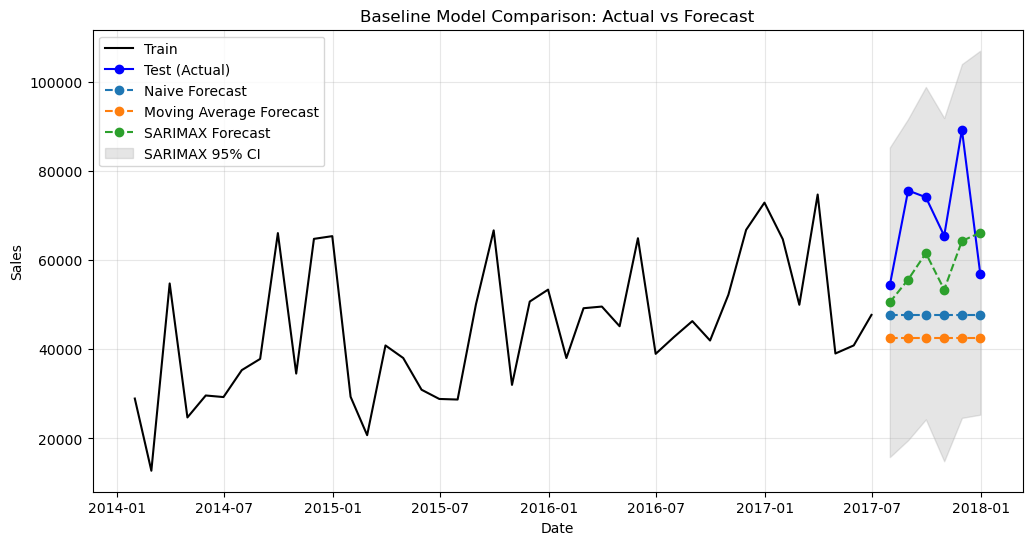

In [203]:


plt.figure(figsize=(12,6))

# Plot actual train + test
plt.plot(train.index, train, label="Train", color="black")
plt.plot(test.index, test, label="Test (Actual)", color="blue", marker='o')

# Naive Forecast (last observed value repeated)
naive_forecast = [train.iloc[-1]] * len(test)
plt.plot(test.index, naive_forecast, label="Naive Forecast", linestyle='--', marker='o')

# Moving Average Forecast (use last 3 months mean repeated)
window = 3
mov_avg_value = train[-window:].mean()
mov_avg_forecast = [mov_avg_value] * len(test)
plt.plot(test.index, mov_avg_forecast, label="Moving Average Forecast", linestyle='--', marker='o')

# SARIMAX Forecast (already fitted)
sarimax_fc = res.get_forecast(steps=len(test))
sarimax_pred = sarimax_fc.predicted_mean
plt.plot(test.index, sarimax_pred, label="SARIMAX Forecast", linestyle='--', marker='o')

# Add confidence intervals for SARIMAX
sarimax_conf = sarimax_fc.conf_int()
plt.fill_between(test.index,
                 sarimax_conf.iloc[:,0],
                 sarimax_conf.iloc[:,1],
                 color='gray', alpha=0.2, label="SARIMAX 95% CI")

# Chart details
plt.title("Baseline Model Comparison: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)

# Save and show
plt.savefig("results/actual_vs_forecast_all_baselines.png", dpi=150)
plt.show()
